#**Data Upload**

In [1]:
from google.colab import files
files.upload()

Saving mtfuji_data.csv to mtfuji_data (1).csv


{'mtfuji_data.csv': b'x,lat,lng,elevation,distance\r\n0,35.134141,139.132082,0,0\r\n1,35.135826,139.129202,0,322\r\n2,35.13751,139.126322,0,644\r\n3,35.139194,139.123441,0,966\r\n4,35.140878,139.12056,0,1288\r\n5,35.142562,139.117679,0,1611\r\n6,35.144246,139.114799,6.62,1933\r\n7,35.145929,139.111917,7.21,2255\r\n8,35.147613,139.109036,12.2,2577\r\n9,35.149297,139.106155,54.41,2899\r\n10,35.15098,139.103273,171.56,3222\r\n11,35.152664,139.100392,177.84,3544\r\n12,35.154347,139.09751,228.21,3866\r\n13,35.15603,139.094628,275.38,4188\r\n14,35.157714,139.091747,433.76,4511\r\n15,35.159397,139.088865,371.74,4833\r\n16,35.16108,139.085982,380.06,5155\r\n17,35.162763,139.0831,503.4,5477\r\n18,35.164446,139.080218,485.39,5799\r\n19,35.166129,139.077335,477.82,6122\r\n20,35.167812,139.074453,580.5,6444\r\n21,35.169495,139.07157,610.92,6766\r\n22,35.171178,139.068687,654.96,7088\r\n23,35.17286,139.065804,628.22,7411\r\n24,35.174543,139.062921,626.64,7733\r\n25,35.176225,139.060038,572.55,8055\

In [2]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [3]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


#**Problem 1**
##*Ploting of data*

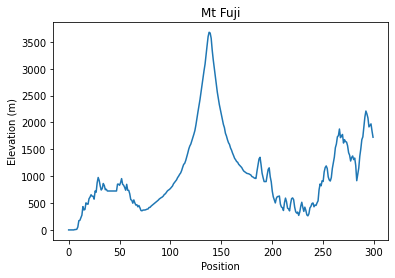

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Mt Fuji")
plt.xlabel("Position")
plt.ylabel("Elevation (m)")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

#**Problem 2**
##*Create a function to calculate the slope of a point*

In [11]:
def slope_fuji(point_number):
  import numpy as np
  x = fuji[:,0]
  y = fuji[:,3]
  xy_array = np.vstack([x,y]).T
  x_difference = x[point_number] - x[point_number-1]
  y_difference = y[point_number] - y[point_number-1]
  slope = y_difference/x_difference
  return slope

slope_point6 = slope_fuji(6)

print(slope_point6)

6.62


#**Problem 3**
##*Create a function to calculate the destination*

In [12]:
def destination_point(current_point, alpha, slope):
  destination = current_point - alpha * slope
  if (destination <=0):
    return 0
  else:
    return round(destination)

#alpha set at 20%
destination_point(100, 0.2, slope_fuji(100))

96

#**Problem 4**
##*Creating a function to go down the mountain*

In [7]:
def downhill(current_point, alpha):
  slope = slope_fuji(current_point)
  downhill = [current_point]
  for i in range(current_point):
    current_point = destination_point(current_point, alpha, slope)
    if downhill[-1] == current_point:
      break
    else:
      downhill.append(current_point)
  return downhill

print(downhill(136, 0.2))

[136, 102, 68, 34, 0]


#**Problem 5**
##*Visualization of the descent process*

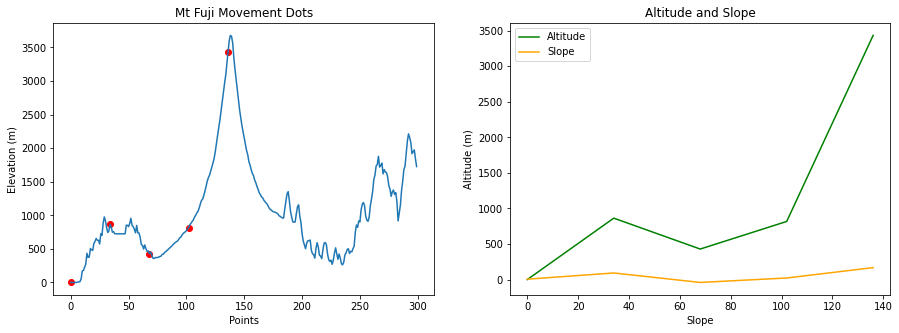

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

destination_ndarray = downhill(136, 0.2)

figure = plt.figure(figsize=(15,5))
figure_1 = figure.add_subplot(1,2,1)

figure_1.set_title("Mt Fuji Movement Dots")
figure_1.set_xlabel("Points")
figure_1.set_ylabel("Elevation (m)")
figure_1.plot(fuji[:,0], fuji[:,3])
figure_1.scatter(destination_ndarray, [fuji[position_2,3] for position_2 in destination_ndarray], c="red")

#create line graph of altitude and slope
figure_2 = figure.add_subplot(1,2,2)
figure_2.set_title("Altitude and Slope")
figure_2.set_xlabel("Slope")
figure_2.set_ylabel("Altitude (m)")
figure_2.plot(destination_ndarray, [fuji[position_2,3] for position_2 in destination_ndarray], c="green", label = "Altitude")
figure_2.plot(destination_ndarray, [slope_fuji(position_2) for position_2 in destination_ndarray], c="orange", label = "Slope")
figure_2.legend()
plt.show()

#**Problem 6 and 7**
##*Change of initial value and Visualization of the descent process for each initial value*

<Figure size 1080x360 with 0 Axes>

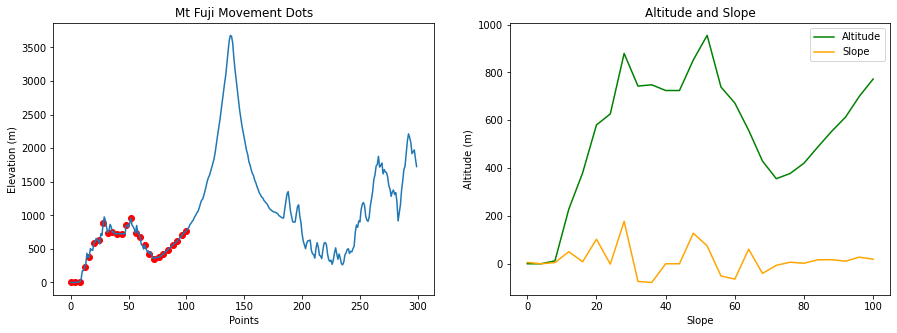

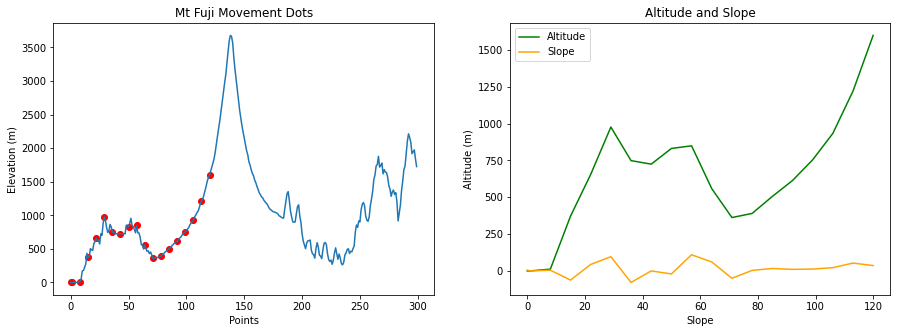

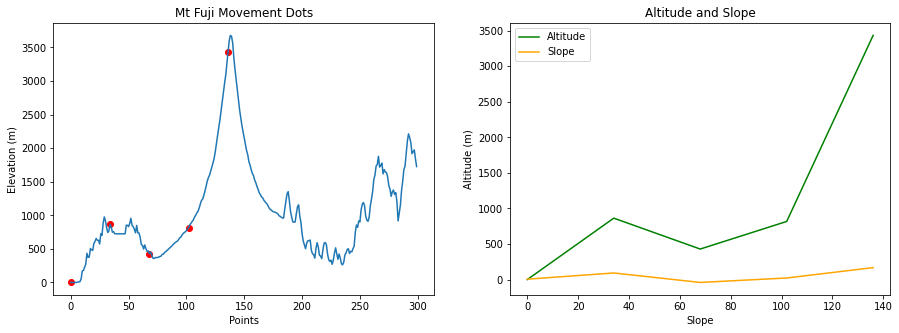

In [9]:
def display_other_points(points):
  figure = plt.figure(figsize=(15,5))
  
  #set alpha at 20%
  alpha = 0.2
  #loop through points
  for i in range (points.size):
    destination_ndarray = downhill(points[i], alpha)
    figure = plt.figure(figsize=(15,5))
    figure_1 = figure.add_subplot(1,2,1)
    
    figure_1.set_title("Mt Fuji Movement Dots")
    figure_1.set_xlabel("Points")
    figure_1.set_ylabel("Elevation (m)")
    figure_1.plot(fuji[:,0], fuji[:,3])
    figure_1.scatter(destination_ndarray, [fuji[position_2,3] for position_2 in destination_ndarray], c="red")

    #create line graph of altitude and slope
    figure_2 = figure.add_subplot(1,2,2)
    figure_2.set_title("Altitude and Slope")
    figure_2.set_xlabel("Slope")
    figure_2.set_ylabel("Altitude (m)")
    figure_2.plot(destination_ndarray, [fuji[position_2,3] for position_2 in destination_ndarray], c="green", label = "Altitude")
    figure_2.plot(destination_ndarray, [slope_fuji(position_2) for position_2 in destination_ndarray], c="orange", label = "Slope")
    figure_2.legend()
    plt.show()

display_other_points(np.array([100,120,136]))

#**Problem 8**
##*Hyperparameter change (Advanced problem)*

<Figure size 1080x360 with 0 Axes>

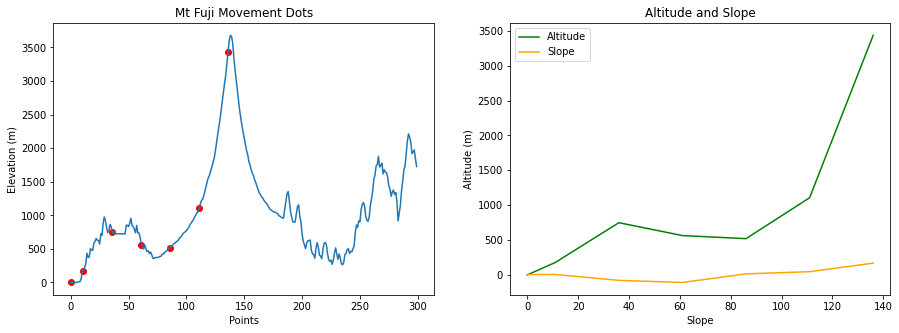

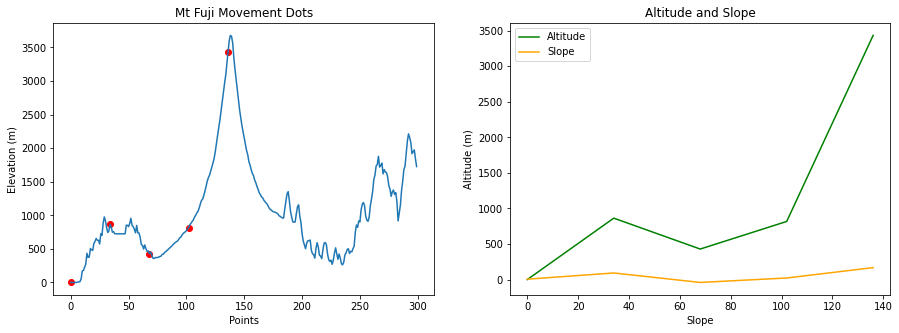

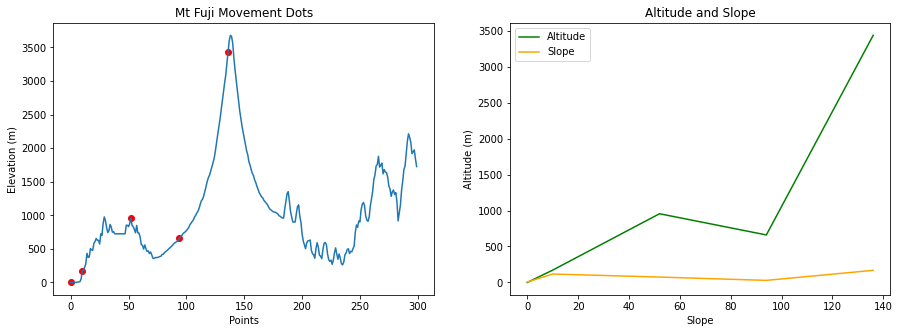

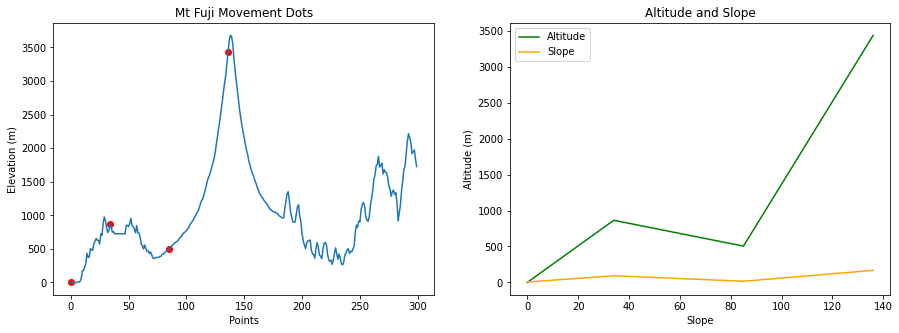

In [10]:
def graph_alpha_values(alpha):
  figure = plt.figure(figsize=(15,5))
  #loop through alphas
  for i in range (alpha.size):
    destination_ndarray = downhill(136, alpha[i])
    figure = plt.figure(figsize=(15,5))
    figure_1 = figure.add_subplot(1,2,1)
    
    figure_1.set_title("Mt Fuji Movement Dots")
    figure_1.set_xlabel("Points")
    figure_1.set_ylabel("Elevation (m)")
    figure_1.plot(fuji[:,0], fuji[:,3])
    figure_1.scatter(destination_ndarray, [fuji[position_2,3] for position_2 in destination_ndarray], c="red")

    #create line graph of altitude and slope
    figure_2 = figure.add_subplot(1,2,2)
    figure_2.set_title("Altitude and Slope")
    figure_2.set_xlabel("Slope")
    figure_2.set_ylabel("Altitude (m)")
    figure_2.plot(destination_ndarray, [fuji[position_2,3] for position_2 in destination_ndarray], c="green", label = "Altitude")
    figure_2.plot(destination_ndarray, [slope_fuji(position_2) for position_2 in destination_ndarray], c="orange", label = "Slope")
    figure_2.legend()
    plt.show()

graph_alpha_values(np.array([0.15,0.2,0.25,0.3]))